In [1]:
import numpy as np
import sys
import torch

sys.path.append('../neural_tensor_train')
from data import Data
from model import Model

Using cache found in /Users/andrei/.cache/torch/hub/pytorch_vision_v0.10.0


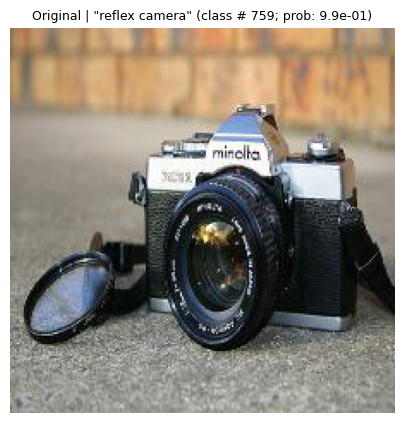

In [2]:
data = Data('imagenet')
model = Model('vgg19', data)
x = data.img_load('demo_image2.jpg')
y, c, l = model.run_pred(x)
data.plot(x, title=f'Original | "{l[:15]}" (class # {c}; prob: {y:-7.1e})')

In [3]:
x_attr = model.attrib(x, steps=3, iters=10)
data.plot_base(x_attr, 'Attribution', size=5)

/Users/andrei/_/code/tetradat/../neural_tensor_train/model/model.py:70: RuntimeWarning: invalid value encountered in divide
  s = 100. * np.cumsum(a_sort) / np.sum(a)


IndexError: index 0 is out of bounds for axis 0 with size 0

# TMP

In [ ]:
import numpy as np
import sys
import torch

sys.path.append('../neural_tensor_train')
from data import Data
from model import Model

In [ ]:
data = Data('cifar10')
model = Model('densenet', data)
x, c_real, l_real = data.get(10, tst=True)
y, c, l = model.run_pred(x)
print(f'Image is classified as "{l}" (class # {c}; prob: {y:-7.1e})')
data.plot(x, title='Original image')

In [ ]:
import torchvision
import matplotlib.pyplot as plt

norm_m = [0.485, 0.456, 0.406]
norm_v = [0.229, 0.224, 0.225]
x = torchvision.io.read_image('demo_image2.jpg')
# plt.imshow(x.permute((1, 2, 0)))
x = torchvision.transforms.ConvertImageDtype(torch.float32)(x)
x = torchvision.transforms.Normalize(norm_m, norm_v)(x)
#x = torchvision.transforms.Resize(224)(x)
print(x.shape)
#x = torchvision.transforms.CenterCrop(224)(x)
print(torch.min(x), torch.max(x))

y, c, l = model.run_pred(x)
print(f'Image is classified as "{l}" (class # {c}; prob: {y:-7.1e})')

In [ ]:
invTrans = torchvision.transforms.Compose([
    torchvision.transforms.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]),
    torchvision.transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ], std=[1., 1., 1.]),
])

x = invTrans(x)
print(torch.min(x), torch.max(x))
plt.imshow(x.permute((1, 2, 0)))

In [ ]:
plt.imshow(x.permute((1, 2, 0)))

In [ ]:
x2 = torchvision.io.read_image('demo_image.jpg')
x2 = torchvision.transforms.ConvertImageDtype(torch.float32)(x)
x2 = ((x2.transpose(0, 2) - torch.tensor(norm_m)) / torch.tensor(norm_v)).transpose(0, 2)
print(torch.min(x2), torch.max(x2))

In [ ]:
data = Data('imagenet')
model = Model('vgg19', data)
x = data.img_load('demo_image.jpg', wo_norm=False)
y, c, l = model.run_pred(x)
print(f'Image is classified as "{l}" (class # {c}; prob: {y:-7.1e})')
data.plot(x, title='Original image')

In [ ]:
x2 = data.tensor_to_plot_imagenet(x)
x2 = data.transform_norm(x2)
data.plot(x2, title='Original image')

In [ ]:
x_attr = attr_ig(model.net, x, c, steps=3, iters=10, device=model.device)

In [ ]:
print(x_attr)
print(np.max(x_attr))
print(np.min(x_attr))
print(np.mean(x_attr))
data.plot_base(x_attr, title='IG', size=5, fpath='attr.png')

In [ ]:
x_attr2 = x_attr.copy()
x_attr2[x_attr2 < 0.4] = 0.
data.plot_base(x_attr2, title='IG', size=5, fpath='attr.png')

In [ ]:
x2 = x.numpy()
x2 = np.moveaxis(x2, 0, 2)
x2 = np.uint8(x2 * 256)
x2.shape